In [6]:
import random
import numpy as np 
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 25)

c:\Users\14708\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\14708\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\14708\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [7]:
main_df = pd.read_csv(r'C:\Users\14708\TMC\Tata-Motors--Consumer-Favorability-Analysis\remaining_df.csv')
df = main_df.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  710 non-null    object 
 1   Headline              710 non-null    object 
 2   URL                   710 non-null    object 
 3   Opening Text          710 non-null    object 
 4   Hit Sentence          710 non-null    object 
 5   Source                710 non-null    object 
 6   Country               710 non-null    object 
 7   Language              710 non-null    object 
 8   Reach                 710 non-null    float64
 9   Desktop Reach         710 non-null    float64
 10  Mobile Reach          710 non-null    float64
 11  Twitter Social Echo   710 non-null    float64
 12  Facebook Social Echo  710 non-null    float64
 13  Reddit Social Echo    710 non-null    float64
 14  Sentiment             710 non-null    object 
 15  label                 7

In [9]:
df.head()

,Date,Headline,URL,Opening Text,Hit Sentence,Source,Country,Language,Reach,Desktop Reach,Mobile Reach,Twitter Social Echo,Facebook Social Echo,Reddit Social Echo,Sentiment,label,day,hour
0,2023-09-28 14:08:00,Kia और Hyundai ने वापस बुलाईं अपनी 35 लाख कारे...,https://hindi.pardaphash.com/kia-and-hyundai-r...,Kia and Hyundai Recalled Cars: वाहन निर्माता क...,Kia and Hyundai Recalled Cars: वाहन निर्माता क...,Pardaphash,India,Hindi,31307.0,1279.0,30028.0,0.0,0.0,0.0,Neutral,hyundai,28,14
1,2023-09-28 13:46:00,"Tata Punch EV spied, may compete with MG Comen...",https://economictimes.indiatimes.com/industry/...,Tata Motors is reportedly developing an electr...,... Punch EV is expected to compete with the M...,The Economic Times,India,English,15403059.0,6171732.0,9231327.0,0.0,0.0,0.0,Neutral,tata,28,13
2,2023-09-28 13:30:00,Tata Avinya Reviews On Road Price 2023 Mileage...,https://badisoch.in/automobile-news/tata-aviny...,... (adsbygoogle = window.adsbygoogle || []).p...,"... , despite most carmakers focusing on large...",Badi Soch,India,English,1128280.0,171549.0,956731.0,0.0,0.0,0.0,Neutral,tata,28,13
3,2023-09-28 12:49:00,Oldest Indian Companies and Their Current Acti...,https://www.businessoutreach.in/oldest-indian-...,"India’s rich еntrеprеnеurial history, dating b...",... on thе intеrnational stagе. Innovation and...,Business Outreach,India,English,71485.0,9301.0,62184.0,0.0,0.0,0.0,Positive,tata,28,12
4,2023-09-28 12:25:00,Maruti Suzuki Swift vs Tata Altroz: Comparing ...,https://nationalcybersecurity.com/maruti-suzuk...,"For a safety-conscious buyer, it is important ...","... to consider the safest cars, or top safety...",National Cyber Security,India,English,817.0,428.0,389.0,0.0,0.0,0.0,Positive,tata,28,12


In [10]:
df.tail()

,Date,Headline,URL,Opening Text,Hit Sentence,Source,Country,Language,Reach,Desktop Reach,Mobile Reach,Twitter Social Echo,Facebook Social Echo,Reddit Social Echo,Sentiment,label,day,hour
705,2023-09-12 06:36:00,MG3 hatchback takes out ‘cheapest car to run’ ...,https://planetcirculate.com/mg3-hatchback-take...,A small car has claimed the title of the cheap...,"... Costs Survey, which lists the cost of runn...",Planet Circulate,India,English,1142.0,1142.0,0.0,0.0,0.0,0.0,Positive,hyundai,12,6
706,2023-09-12 06:20:00,MG3 hatchback takes out ‘cheapest car to run’ ...,https://bulletinreporter.com/mg3-hatchback-tak...,A small car has claimed the title of the cheap...,"... Costs Survey, which lists the cost of runn...",Bulletin Reporter,India,English,2074.0,2074.0,0.0,0.0,0.0,0.0,Positive,hyundai,12,6
707,2023-09-12 05:24:00,MG3 hatchback named by RACV as the most cost-e...,https://vervetimes.com/mg3-hatchback-named-by-...,A small car has claimed the title of the cheap...,"... Costs Survey, which lists the cost of runn...",Verve times - Latest News around the World,India,English,26425.0,7491.0,18934.0,0.0,0.0,0.0,Positive,hyundai,12,5
708,2023-09-12 04:37:00,RACV names MG3 hatchback as the cheapest vehic...,https://newsconcerns.com/racv-names-mg3-hatchb...,A small car has claimed the title of the cheap...,"... Costs Survey, which lists the cost of runn...",News Concerns - Latest News Update,India,English,9323.0,2527.0,6796.0,0.0,0.0,0.0,Positive,hyundai,12,4
709,2023-09-12 04:04:00,Tata Power EZ App Electrifies Green Revolution...,https://thenfapost.com/tata-power-ez-app-elect...,Tata Power EZ App Electrifies Green Revolution...,Charging hubs for leading cab fleet operators....,NFAPost,India,English,851.0,851.0,0.0,0.0,0.0,0.0,Neutral,tata,12,4


In [11]:
sentiment_keywords = {'Neutral':0, 'Negative':-1, 'Positive':1}
df['sentiment_score'] = df['Sentiment'].map(sentiment_keywords)

In [12]:
df.columns

Index(['Date', 'Headline', 'URL', 'Opening Text', 'Hit Sentence', 'Source',
       'Country', 'Language', 'Reach', 'Desktop Reach', 'Mobile Reach',
       'Twitter Social Echo', 'Facebook Social Echo', 'Reddit Social Echo',
       'Sentiment', 'label', 'day', 'hour', 'sentiment_score'],
      dtype='object')

In [13]:
cat_cols = df.select_dtypes('object').columns
num_cols = df.select_dtypes(include=np.number).columns

In [14]:
cat_cols

Index(['Date', 'Headline', 'URL', 'Opening Text', 'Hit Sentence', 'Source',
       'Country', 'Language', 'Sentiment', 'label'],
      dtype='object')

In [15]:
def plot_categorical_distribution(dataframe):
    categorical_columns = [  'Country',
       'Language', 'Sentiment', 'label']
    
    num_cols = len(categorical_columns)
    num_rows = (num_cols + 1) // 2

    # Increase the width of subplots by modifying the figsize parameter
    fig, axes = plt.subplots(num_rows, 2, figsize=(16, num_rows * 4))

    if num_rows == 1:
        axes = axes.flatten()
    
    for i, column in enumerate(categorical_columns):
        row, col = divmod(i, 2)
        
        ax = axes[row, col]  # Access the specific subplot in the grid
        ax.set_title(f'Distribution of {column}')
        sns.countplot(data=dataframe, x=column, order=dataframe[column].value_counts().index, ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
    for i in range(num_cols, num_rows * 2):
        fig.delaxes(axes.flatten()[i])
    
    plt.tight_layout()
    plt.show()

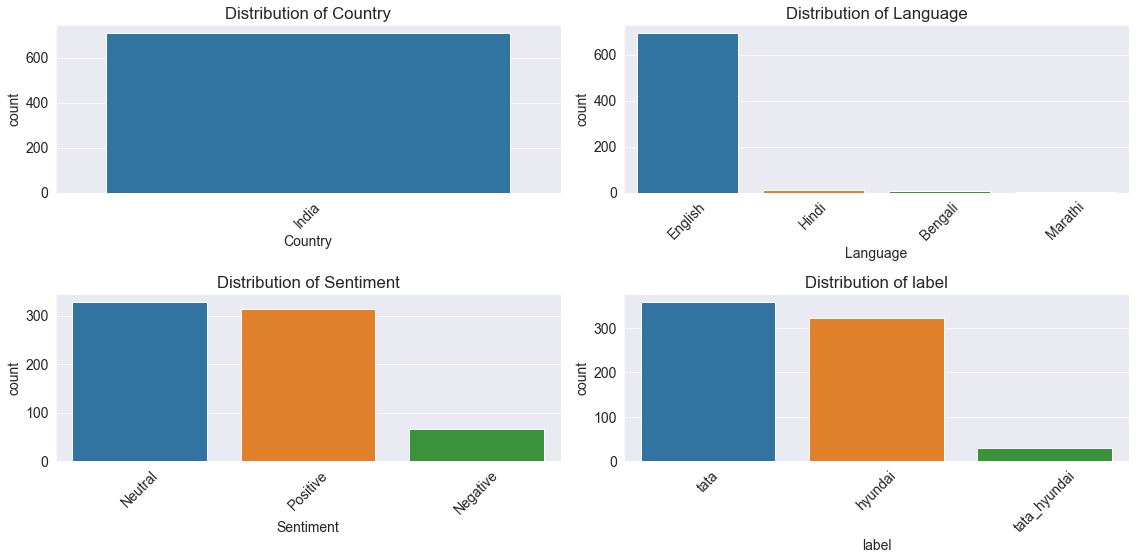

In [16]:
plot_categorical_distribution(df)

In [17]:
def map_sentiment_score_to_label(sentiment_score):
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis based on 'Sentiment Score' column
df['Sentiment Analysis'] = df['sentiment_score'].apply(map_sentiment_score_to_label)

df

,Date,Headline,URL,Opening Text,Hit Sentence,Source,Country,Language,Reach,Desktop Reach,Mobile Reach,Twitter Social Echo,Facebook Social Echo,Reddit Social Echo,Sentiment,label,day,hour,sentiment_score,Sentiment Analysis
0,2023-09-28 14:08:00,Kia और Hyundai ने वापस बुलाईं अपनी 35 लाख कारे...,https://hindi.pardaphash.com/kia-and-hyundai-r...,Kia and Hyundai Recalled Cars: वाहन निर्माता क...,Kia and Hyundai Recalled Cars: वाहन निर्माता क...,Pardaphash,India,Hindi,31307.0,1279.0,30028.0,0.0,0.0,0.0,Neutral,hyundai,28,14,0,Neutral
1,2023-09-28 13:46:00,"Tata Punch EV spied, may compete with MG Comen...",https://economictimes.indiatimes.com/industry/...,Tata Motors is reportedly developing an electr...,... Punch EV is expected to compete with the M...,The Economic Times,India,English,15403059.0,6171732.0,9231327.0,0.0,0.0,0.0,Neutral,tata,28,13,0,Neutral
2,2023-09-28 13:30:00,Tata Avinya Reviews On Road Price 2023 Mileage...,https://badisoch.in/automobile-news/tata-aviny...,... (adsbygoogle = window.adsbygoogle || []).p...,"... , despite most carmakers focusing on large...",Badi Soch,India,English,1128280.0,171549.0,956731.0,0.0,0.0,0.0,Neutral,tata,28,13,0,Neutral
3,2023-09-28 12:49:00,Oldest Indian Companies and Their Current Acti...,https://www.businessoutreach.in/oldest-indian-...,"India’s rich еntrеprеnеurial history, dating b...",... on thе intеrnational stagе. Innovation and...,Business Outreach,India,English,71485.0,9301.0,62184.0,0.0,0.0,0.0,Positive,tata,28,12,1,Positive
4,2023-09-28 12:25:00,Maruti Suzuki Swift vs Tata Altroz: Comparing ...,https://nationalcybersecurity.com/maruti-suzuk...,"For a safety-conscious buyer, it is important ...","... to consider the safest cars, or top safety...",National Cyber Security,India,English,817.0,428.0,389.0,0.0,0.0,0.0,Positive,tata,28,12,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,2023-09-12 06:36:00,MG3 hatchback takes out ‘cheapest car to run’ ...,https://planetcirculate.com/mg3-hatchback-take...,A small car has claimed the title of the cheap...,"... Costs Survey, which lists the cost of runn...",Planet Circulate,India,English,1142.0,1142.0,0.0,0.0,0.0,0.0,Positive,hyundai,12,6,1,Positive
706,2023-09-12 06:20:00,MG3 hatchback takes out ‘cheapest car to run’ ...,https://bulletinreporter.com/mg3-hatchback-tak...,A small car has claimed the title of the cheap...,"... Costs Survey, which lists the cost of runn...",Bulletin Reporter,India,English,2074.0,2074.0,0.0,0.0,0.0,0.0,Positive,hyundai,12,6,1,Positive
707,2023-09-12 05:24:00,MG3 hatchback named by RACV as the most cost-e...,https://vervetimes.com/mg3-hatchback-named-by-...,A small car has claimed the title of the cheap...,"... Costs Survey, which lists the cost of runn...",Verve times - Latest News around the World,India,English,26425.0,7491.0,18934.0,0.0,0.0,0.0,Positive,hyundai,12,5,1,Positive
708,2023-09-12 04:37:00,RACV names MG3 hatchback as the cheapest vehic...,https://newsconcerns.com/racv-names-mg3-hatchb...,A small car has claimed the title of the cheap...,"... Costs Survey, which lists the cost of runn...",News Concerns - Latest News Update,India,English,9323.0,2527.0,6796.0,0.0,0.0,0.0,Positive,hyundai,12,4,1,Positive


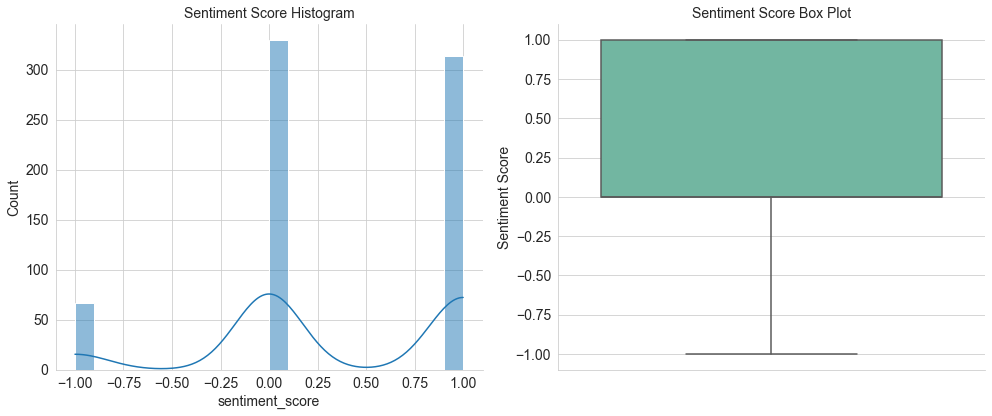

In [18]:
# Creating a figure with subplots
sns.set_style('whitegrid')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data=df, x='sentiment_score', bins=20, kde=True, ax=ax1, palette='viridis')
ax1.set_title('Sentiment Score Histogram', fontsize=14)

sns.boxplot(data=df, y='sentiment_score', ax=ax2, palette='Set2')
ax2.set_title('Sentiment Score Box Plot', fontsize=14)

ax2.set(ylabel='Sentiment Score')

sns.despine()

plt.tight_layout()
plt.show()

In [19]:
# Summary statistics for 'Sentiment Score' column
sentiment_score_stats = df['sentiment_score'].describe()

# Distribution of 'Sentiment Score'
sentiment_score_distribution = df['sentiment_score'].value_counts()

# Mean sentiment score
mean_sentiment_score = df['sentiment_score'].mean()

# Median sentiment score
median_sentiment_score = df['sentiment_score'].median()

print("Summary Statistics for 'Sentiment Score':")
print(sentiment_score_stats)

print("\nDistribution of 'Sentiment Score':")
print(sentiment_score_distribution)

print(f"\nMean Sentiment Score: {mean_sentiment_score}")
print(f"Median Sentiment Score: {median_sentiment_score}")

Summary Statistics for 'Sentiment Score':
count    710.000000
mean       0.347887
std        0.645120
min       -1.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: sentiment_score, dtype: float64

Distribution of 'Sentiment Score':
 0    329
 1    314
-1     67
Name: sentiment_score, dtype: int64

Mean Sentiment Score: 0.34788732394366195
Median Sentiment Score: 0.0


In [20]:
hyundai_data = df[df['label'] == 'hyundai']
tata_data = df[df['label'] == 'tata']

## Customer Perception

### Tata

In [21]:
average_sentiment_score = tata_data['sentiment_score'].mean()

def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

tata_data['Sentiment Category'] = tata_data['sentiment_score'].apply(categorize_sentiment)

average_reach = tata_data['Reach'].mean()

sentiment_counts = tata_data['Sentiment Category'].value_counts()

# Calculate the percentage of each sentiment category
sentiment_percentages = (sentiment_counts / sentiment_counts.sum()) * 100

print(f"Average Sentiment Score for Tata cars: {average_sentiment_score:.2f}")
print(f"Average Reach for Tata cars: {average_reach:.2f}")
print("\nSentiment Category Counts:")
print(sentiment_counts)
print("\nSentiment Category Percentages:")
print(sentiment_percentages)

Average Sentiment Score for Tata cars: 0.42
Average Reach for Tata cars: 5946106.66

Sentiment Category Counts:
Neutral     192
Positive    159
Negative      8
Name: Sentiment Category, dtype: int64

Sentiment Category Percentages:
Neutral     53.481894
Positive    44.289694
Negative     2.228412
Name: Sentiment Category, dtype: float64


C:\Users\14708\AppData\Local\Temp\ipykernel_22072\3291404411.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tata_data['Sentiment Category'] = tata_data['sentiment_score'].apply(categorize_sentiment)


In [22]:
def categorize_attribute(sentence):
    if any(keyword in sentence.lower() for keyword in ['safety', 'secure', 'crash', 'protection']):
        return 'Safety'
    elif any(keyword in sentence.lower() for keyword in ['fuel efficiency', 'mileage', 'mpg', 'consumption']):
        return 'Fuel Efficiency'
    elif any(keyword in sentence.lower() for keyword in ['accessories', 'features', 'interior', 'technology']):
        return 'Accessories'
    elif any(keyword in sentence.lower() for keyword in ['electric vehicle', 'ev', 'battery', 'charging']):
        return 'EV'
    elif any(keyword in sentence.lower() for keyword in ['performance', 'speed', 'acceleration', 'horsepower']):
        return 'Performance'
    elif any(keyword in sentence.lower() for keyword in ['cost', 'price', 'affordable', 'expensive']):
        return 'Cost'
    else:
        return 'Other'

tata_data['Attribute'] = tata_data['Hit Sentence'].apply(categorize_attribute)

average_sentiment = tata_data.groupby('Attribute').agg({'sentiment_score': 'mean', 'Reach': 'sum'}).reset_index()

print(average_sentiment)


         Attribute  sentiment_score         Reach
0      Accessories         0.615385  7.423170e+07
1             Cost         0.720000  2.485712e+08
2               EV         0.282828  6.596290e+08
3  Fuel Efficiency         0.666667  1.265916e+07
4            Other         0.430622  1.131244e+09
5      Performance         0.000000  2.702500e+04
6           Safety         0.500000  8.290057e+06


C:\Users\14708\AppData\Local\Temp\ipykernel_22072\2669460840.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tata_data['Attribute'] = tata_data['Hit Sentence'].apply(categorize_attribute)


### Hyundai

In [23]:
average_sentiment_score_hyundai = hyundai_data['sentiment_score'].mean()

def categorize_sentiment_hyundai(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

hyundai_data['Sentiment Category'] = hyundai_data['sentiment_score'].apply(categorize_sentiment_hyundai)

average_reach_hyundai = hyundai_data['Reach'].mean()

sentiment_counts_hyundai = hyundai_data['Sentiment Category'].value_counts()

# Calculate the percentage of each sentiment category for Hyundai
sentiment_percentages_hyundai = (sentiment_counts_hyundai / sentiment_counts_hyundai.sum()) * 100

print(f"Average Sentiment Score for Hyundai cars: {average_sentiment_score_hyundai:.2f}")
print(f"Average Reach for Hyundai cars: {average_reach_hyundai:.2f}")
print("\nSentiment Category Counts for Hyundai:")
print(sentiment_counts_hyundai)
print("\nSentiment Category Percentages for Hyundai:")
print(sentiment_percentages_hyundai)

Average Sentiment Score for Hyundai cars: 0.26
Average Reach for Hyundai cars: 5640402.25

Sentiment Category Counts for Hyundai:
Positive    143
Neutral     121
Negative     58
Name: Sentiment Category, dtype: int64

Sentiment Category Percentages for Hyundai:
Positive    44.409938
Neutral     37.577640
Negative    18.012422
Name: Sentiment Category, dtype: float64


C:\Users\14708\AppData\Local\Temp\ipykernel_22072\1272697996.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyundai_data['Sentiment Category'] = hyundai_data['sentiment_score'].apply(categorize_sentiment_hyundai)


In [24]:
def categorize_attribute(sentence):
    if any(keyword in sentence.lower() for keyword in ['safety', 'secure', 'crash', 'protection']):
        return 'Safety'
    elif any(keyword in sentence.lower() for keyword in ['fuel efficiency', 'mileage', 'mpg', 'consumption']):
        return 'Fuel Efficiency'
    elif any(keyword in sentence.lower() for keyword in ['accessories', 'features', 'interior', 'technology']):
        return 'Accessories'
    elif any(keyword in sentence.lower() for keyword in ['electric vehicle', 'ev', 'battery', 'charging']):
        return 'EV'
    elif any(keyword in sentence.lower() for keyword in ['performance', 'speed', 'acceleration', 'horsepower']):
        return 'Performance'
    elif any(keyword in sentence.lower() for keyword in ['cost', 'price', 'affordable', 'expensive']):
        return 'Cost'
    else:
        return 'Other'

hyundai_data['Attribute'] = hyundai_data['Hit Sentence'].apply(categorize_attribute)

average_sentiment_hyundai = hyundai_data.groupby('Attribute').agg({'sentiment_score': 'mean', 'Reach': 'sum'}).reset_index()

print(average_sentiment_hyundai)


         Attribute  sentiment_score         Reach
0      Accessories         0.750000  2.532744e+07
1             Cost         1.000000  1.416843e+08
2               EV         0.127660  3.167399e+08
3  Fuel Efficiency         1.000000  5.969697e+07
4            Other         0.219828  1.177095e+09
5      Performance         0.666667  2.784918e+06
6           Safety         0.000000  9.288142e+07


C:\Users\14708\AppData\Local\Temp\ipykernel_22072\1250975683.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyundai_data['Attribute'] = hyundai_data['Hit Sentence'].apply(categorize_attribute)


## Comparision

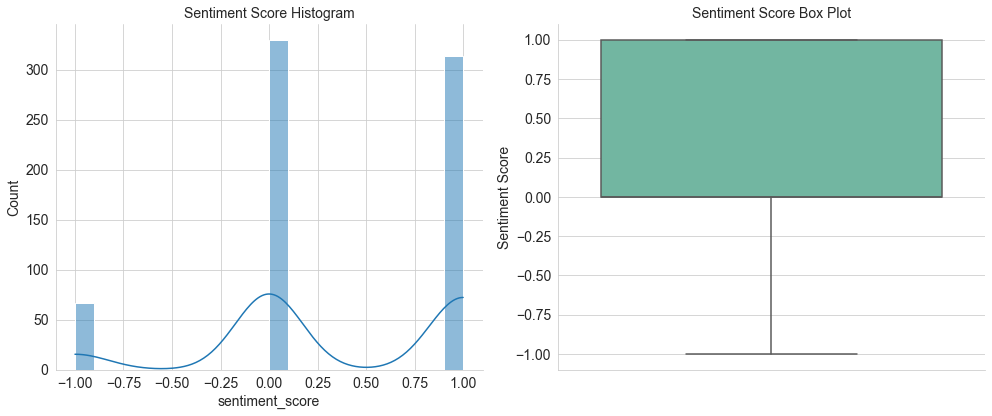

In [25]:
# Creating a figure with subplots
sns.set_style('whitegrid')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data=df, x='sentiment_score', bins=20, kde=True, ax=ax1, palette='viridis')
ax1.set_title('Sentiment Score Histogram', fontsize=14)

sns.boxplot(data=df, y='sentiment_score', ax=ax2, palette='Set2')
ax2.set_title('Sentiment Score Box Plot', fontsize=14)

ax2.set(ylabel='Sentiment Score')

sns.despine()

plt.tight_layout()
plt.show()

In [26]:
# Summary statistics for 'Sentiment Score' column
sentiment_score_stats = df['sentiment_score'].describe()

# Distribution of 'Sentiment Score'
sentiment_score_distribution = df['sentiment_score'].value_counts()

# Mean sentiment score
mean_sentiment_score = df['sentiment_score'].mean()

# Median sentiment score
median_sentiment_score = df['sentiment_score'].median()

print("Summary Statistics for 'Sentiment Score':")
print(sentiment_score_stats)

print("\nDistribution of 'Sentiment Score':")
print(sentiment_score_distribution)

print(f"\nMean Sentiment Score: {mean_sentiment_score}")
print(f"Median Sentiment Score: {median_sentiment_score}")

Summary Statistics for 'Sentiment Score':
count    710.000000
mean       0.347887
std        0.645120
min       -1.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: sentiment_score, dtype: float64

Distribution of 'Sentiment Score':
 0    329
 1    314
-1     67
Name: sentiment_score, dtype: int64

Mean Sentiment Score: 0.34788732394366195
Median Sentiment Score: 0.0


C:\Users\14708\AppData\Local\Temp\ipykernel_22072\3880262312.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tata_hyundai_data['Attribute'] = tata_hyundai_data['Hit Sentence'].apply(categorize_attribute)


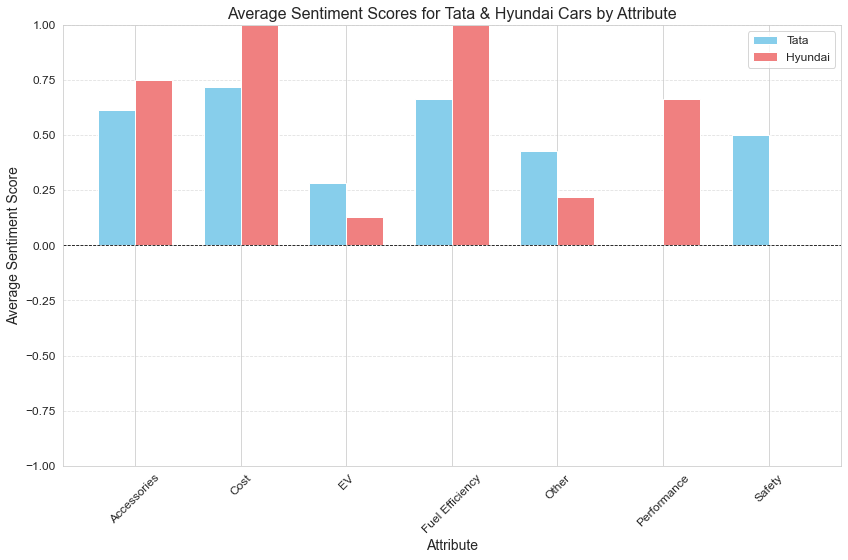

In [27]:
''' Analyzing and Categorizing Average Sentiment Scores for Tata Cars with a Focus on Attributes Including 
Safety, Fuel Efficiency, Accessories, and ICE vs. EV '''

tata_hyundai_data = df[df['label'].isin(['tata', 'hyundai'])]

# Create a new column 'Attribute' based on the 'Hit Sentence' content
def categorize_attribute(sentence):
    if any(keyword in sentence.lower() for keyword in ['safety', 'secure', 'crash', 'protection']):
        return 'Safety'
    elif any(keyword in sentence.lower() for keyword in ['fuel efficiency', 'mileage', 'mpg', 'consumption']):
        return 'Fuel Efficiency'
    elif any(keyword in sentence.lower() for keyword in ['accessories', 'features', 'interior', 'technology']):
        return 'Accessories'
    elif any(keyword in sentence.lower() for keyword in ['electric vehicle', 'ev', 'battery', 'charging']):
        return 'EV'
    elif any(keyword in sentence.lower() for keyword in ['performance', 'speed', 'acceleration', 'horsepower']):
        return 'Performance'
    elif any(keyword in sentence.lower() for keyword in ['cost', 'price', 'affordable', 'expensive']):
        return 'Cost'
    else:
        return 'Other'

tata_hyundai_data['Attribute'] = tata_hyundai_data['Hit Sentence'].apply(categorize_attribute)

# Group by 'Attribute' and 'label' and calculate the average sentiment score
average_sentiment = tata_hyundai_data.groupby(['Attribute', 'label'])['sentiment_score'].mean().unstack().reset_index()

# Create a beautiful grouped bar chart to compare average sentiment scores
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(average_sentiment['Attribute']))
plt.bar(index, average_sentiment['tata'], bar_width, label='Tata', color='skyblue')
plt.bar([i + bar_width for i in index], average_sentiment['hyundai'], bar_width, label='Hyundai', color='lightcoral')
plt.title("Average Sentiment Scores for Tata & Hyundai Cars by Attribute", fontsize=16)
plt.xlabel("Attribute", fontsize=14)
plt.ylabel("Average Sentiment Score", fontsize=14)
plt.xticks([i + bar_width / 2 for i in index], average_sentiment['Attribute'], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.ylim(-1, 1)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
